In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use( 'ggplot' ) 

In [16]:
import pandas 

In [17]:
feature_sets = [ 
    '/Users/alex/Documents/bagel-benchmark/rosetta_runs/benchmark/feature_set.csv',
    '/Users/alex/Documents/bagel-benchmark/foldx_runs/pssm/feature_set.csv', 
    '/Users/alex/Documents/bagel-benchmark/rosetta_runs/ddg_monomer/feature_set.csv', 
]

In [18]:
df = pandas.read_csv( '../data_sets/experimental_data/data_set.csv', index_col=0 ) 

In [19]:
# wt score in benchamrk feature set -692.04100

In [20]:
mutants_of_interest = [
    'E164A', 
    'N404C', 
    'E222H',
    
]

In [21]:
pandas.options.display.max_rows = 1000

In [22]:
for mutant_of_interest in mutants_of_interest: 
    print( mutant_of_interest ) 
    for feature_set in feature_sets:
        my_df = pandas.read_csv( feature_set, index_col=0 ) 
        J = df.join( my_df ) 
        my_feats = J.loc[ mutant_of_interest ] 
        some_bull_shit = [ i for i in my_feats.index if i in [ 'total_score', 'total', 'total energy' ] ]
        print( feature_set.split( '/' )[-2], J.loc[ mutant_of_interest ][ some_bull_shit ] ) 

E164A
benchmark total_score   -694.839
Name: E164A, dtype: float64
pssm total energy    1.04205
Name: E164A, dtype: float64
ddg_monomer total   -0.732
Name: E164A, dtype: float64
N404C
benchmark total_score   -691.847
Name: N404C, dtype: float64
pssm total energy   -1.52533
Name: N404C, dtype: float64
ddg_monomer total    0.799
Name: N404C, dtype: float64
E222H
benchmark total_score   -689.688
Name: E222H, dtype: float64
pssm total energy    2.0919
Name: E222H, dtype: float64
ddg_monomer total   -4.214
Name: E222H, dtype: float64


In [23]:
# create dict of feature set DataFrames 

my_feature_sets = {}

for feature_set in feature_sets:
    my_df = pandas.read_csv( feature_set, index_col=0 ) 
    J = df.join( my_df ) 
    feature_set_name = feature_set.split( '/' )[-2] 
    my_feature_sets.update( { feature_set_name: J } ) 
    # where J is a pandas DataFrame

In [24]:
my_feature_sets.keys()

dict_keys(['benchmark', 'pssm', 'ddg_monomer'])

In [25]:
my_feature_sets[ 'benchmark' ].loc[ 'E164A' ]

sequence_pos             164.000
expression                 1.000
tm                        45.990
k                         -0.370
err_tm                     0.130
err_k                      0.020
kcat                       1.000
err_kcat                   0.100
km                         1.010
err_km                     0.170
kcatkm                    19.000
err_kcatkm                 1.000
ki                           NaN
ki_percent_err               NaN
ki_err                       NaN
gel_number                10.000
total_score             -694.839
fa_rep                   286.722
hbond_sc                 -69.418
all_cst                    0.000
tot_pstat_pm               0.696
tot_nlpstat_pm             0.691
tot_burunsat_pm          150.600
tot_hbond_pm             437.400
tot_NLconts_pm           152.200
tot_nlsurfaceE_pm          0.994
tot_total_charge         -26.700
tot_total_pos_charges     36.000
tot_total_neg_charges     62.700
tot_seq_recovery           1.000
SR_1      

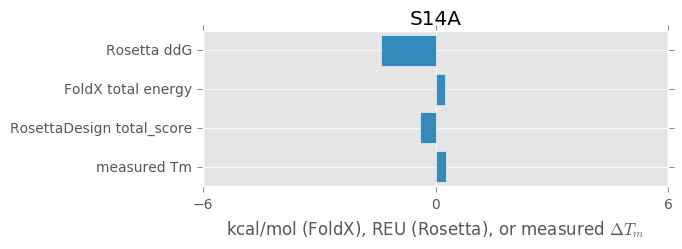

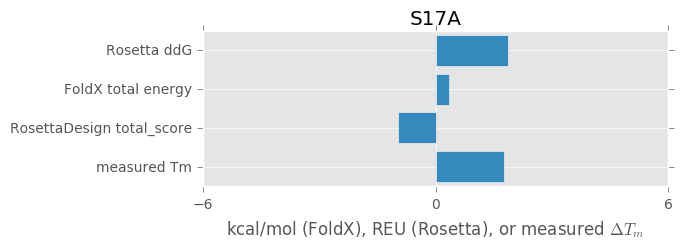

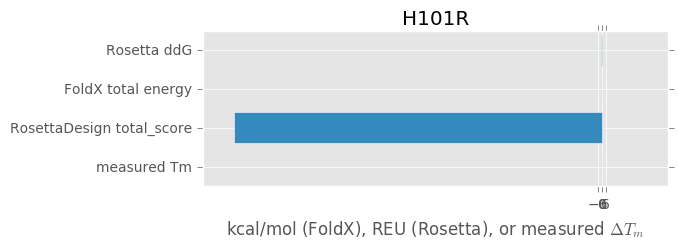

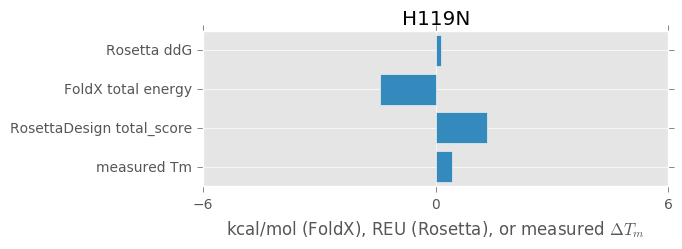

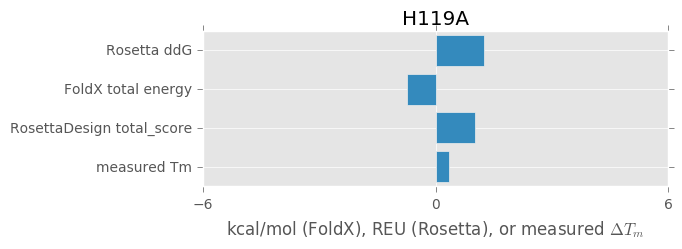

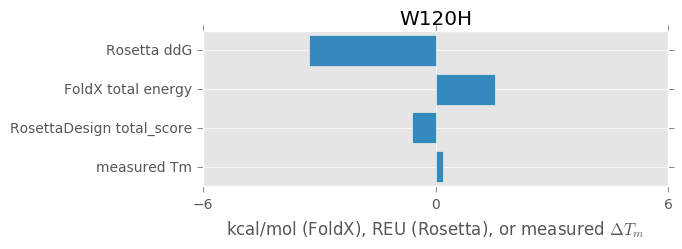

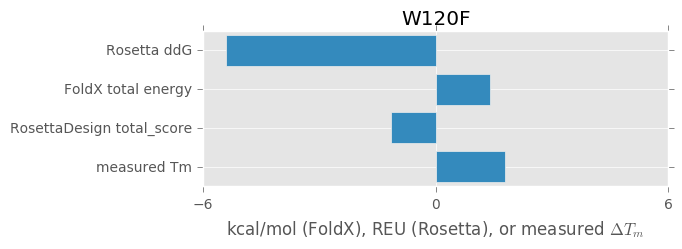

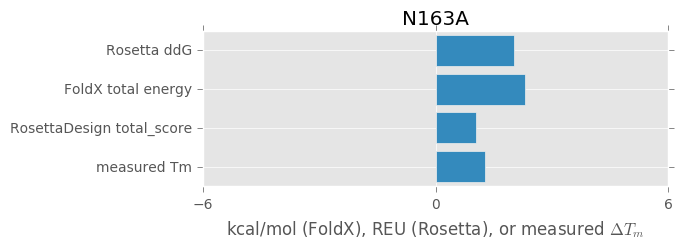

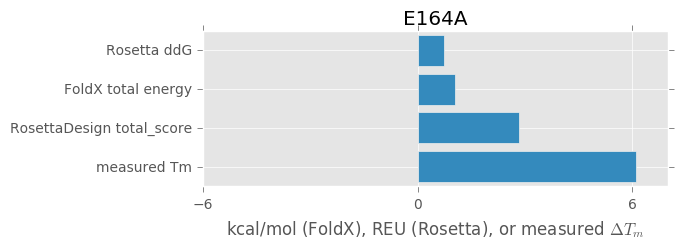

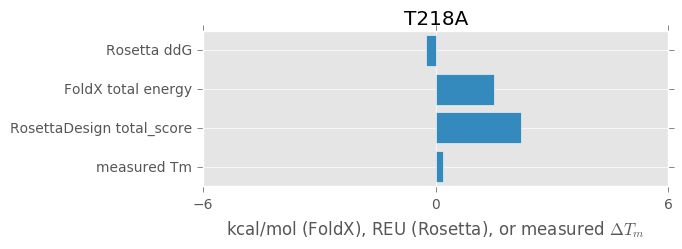

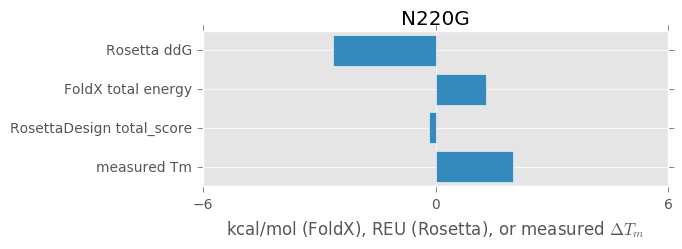

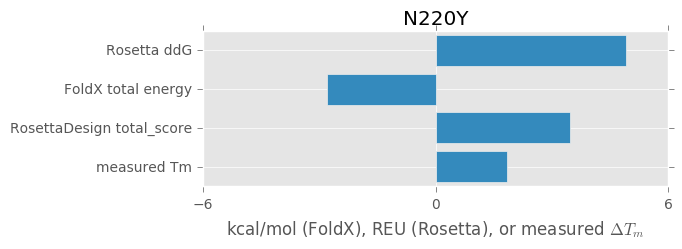

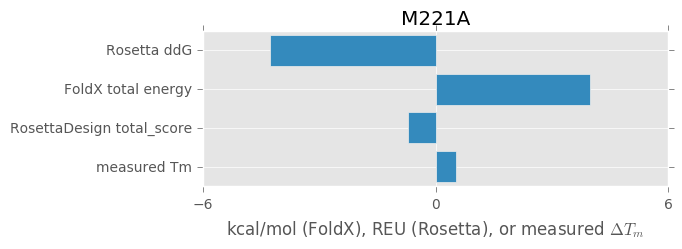

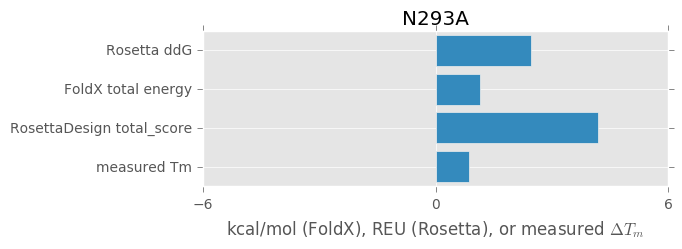

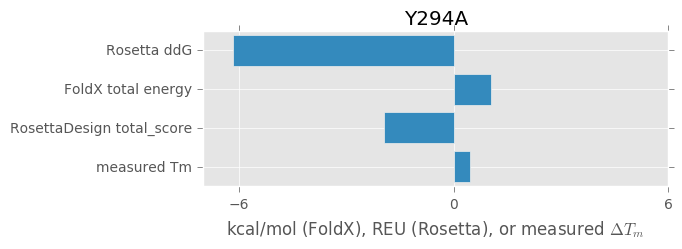

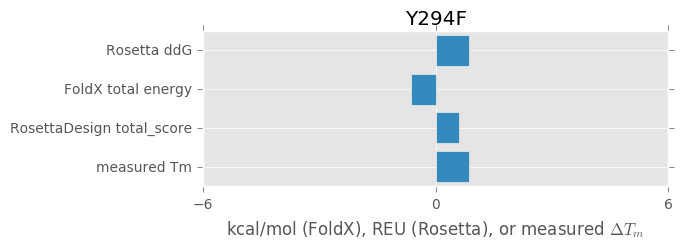

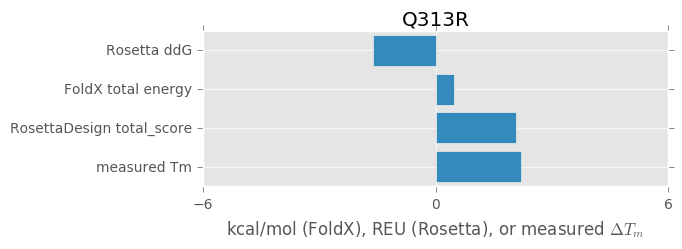

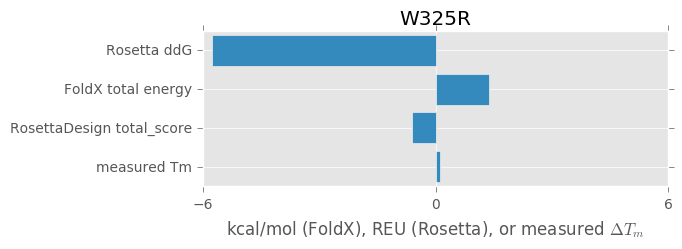

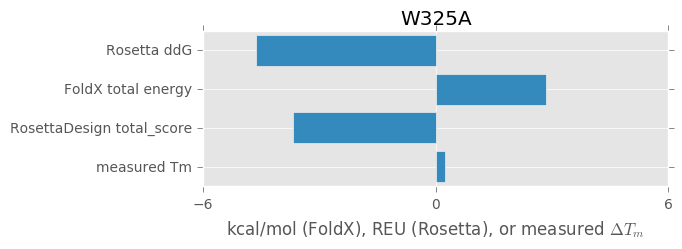

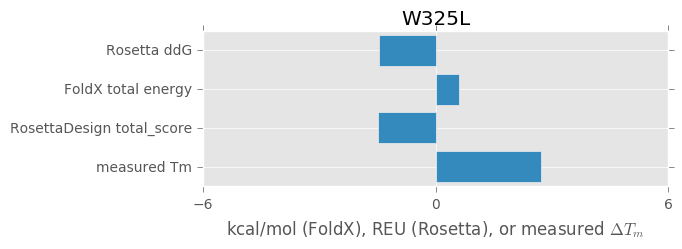

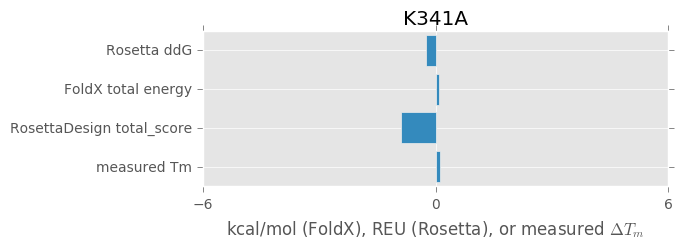

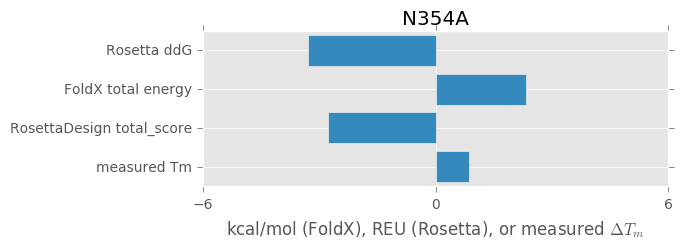

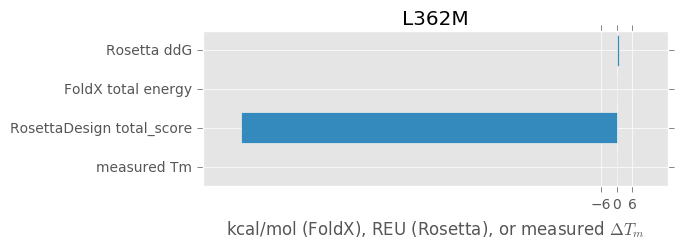

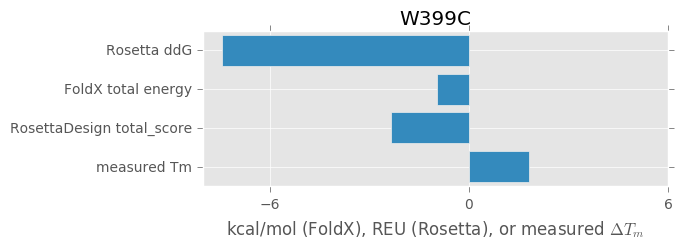

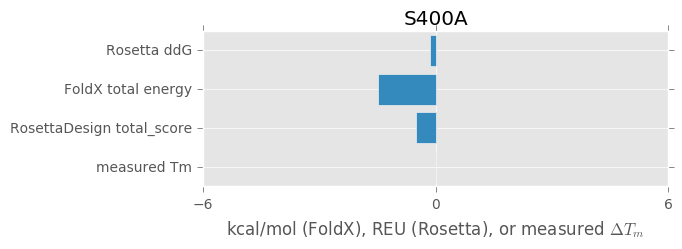

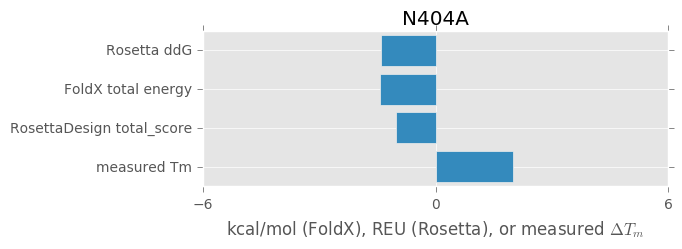

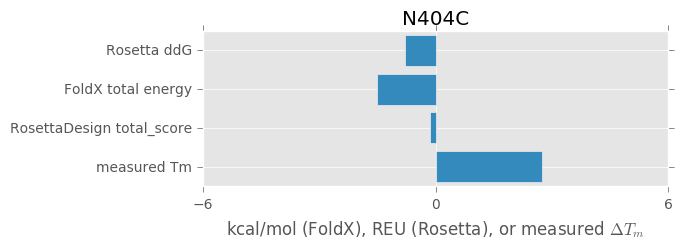

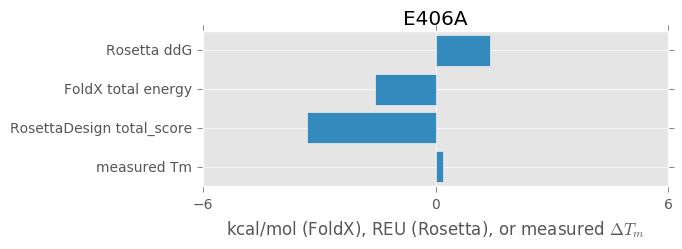

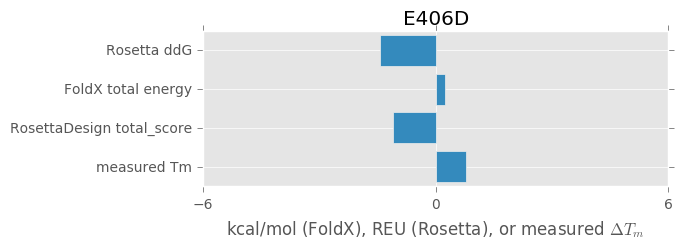

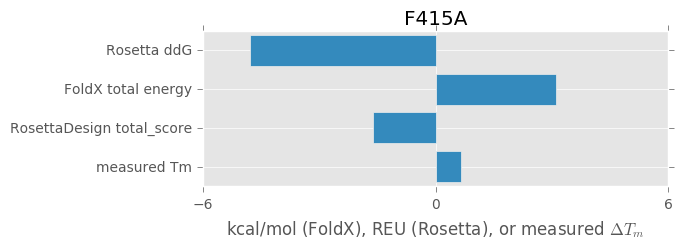

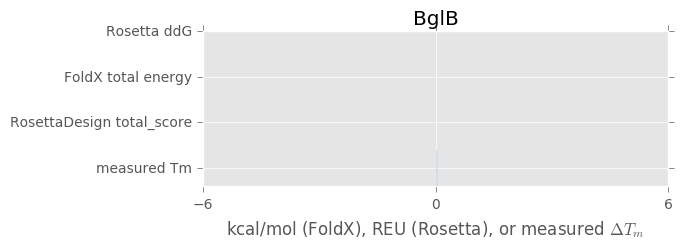

In [27]:
for m in df.index:
    measured = df.loc[ m ].tm - 39.9 
    if measured > 0:
        rosetta_design = - ( my_feature_sets[ 'benchmark' ].loc[ m ][ 'total_score' ] + 692 )
        foldx = my_feature_sets[ 'pssm' ].loc[ m ][ 'total energy' ]
        ddg = - my_feature_sets[ 'ddg_monomer' ].loc[ m ][ 'total' ] 

        plt.figure( figsize=( 6, 2 ) ) 
        plt.barh( range( 4 ), [ measured, rosetta_design, foldx, ddg ], align='center' )
        plt.yticks( range( 4 ), [ 'measured Tm', 'RosettaDesign total_score', 'FoldX total energy', 'Rosetta ddG' ] ) 
        plt.xlabel( 'kcal/mol (FoldX), REU (Rosetta), or measured $\Delta T_m$' ) 

        plt.xticks( [ -6, 0, 6 ] ) 
        plt.title( m ) 
        plt.show()

In [32]:
foldx_df = my_feature_sets[ 'pssm' ]
rosetta_df = my_feature_sets[ 'ddg_monomer' ]

Correlations between FoldX features and experimental data 

In [37]:
foldx_df.corr()[ 'tm' ].sort_values()

Electrostatics          -0.302553
k                       -0.267309
Solvation Polar         -0.210255
total energy            -0.201680
energy Ionisation       -0.142350
Van der Waals clashes   -0.137645
torsional clash         -0.119881
err_kcatkm              -0.096269
err_tm                  -0.045518
Solvation Hydrophobic   -0.023985
kcat                    -0.006706
disulfide                0.016816
Sidechain Hbond          0.042730
err_kcat                 0.045570
kcatkm                   0.056937
ki                       0.069617
entropy sidechain        0.072241
backbone clash           0.080755
Van der Waals            0.093298
helix dipole             0.114041
sequence_pos             0.121660
ki_err                   0.142197
entropy mainchain        0.147347
km                       0.165820
gel_number               0.181316
err_km                   0.187458
err_k                    0.245748
ki_percent_err           0.262181
Backbone Hbond           0.300812
tm            

Correlation between Rosetta features and experimental data 

In [38]:
rosetta_df.corr()[ 'tm' ].sort_values()

fa_sol           -0.288709
k                -0.267309
fa_dun           -0.136712
err_kcatkm       -0.096269
pro_close        -0.064054
fa_intra_rep     -0.056558
yhh_planarity    -0.049532
fa_rep           -0.046823
err_tm           -0.045518
kcat             -0.006706
err_kcat          0.045570
fa_elec           0.053050
total             0.053128
kcatkm            0.056937
ki                0.069617
hbond_sc          0.096646
sequence_pos      0.121660
ki_err            0.142197
rama              0.160762
km                0.165820
p_aa_pp           0.175441
gel_number        0.181316
err_km            0.187458
err_k             0.245748
ki_percent_err    0.262181
fa_atr            0.267818
hbond_bb_sc       0.311031
tm                1.000000
expression             NaN
omega                  NaN
Name: tm, dtype: float64

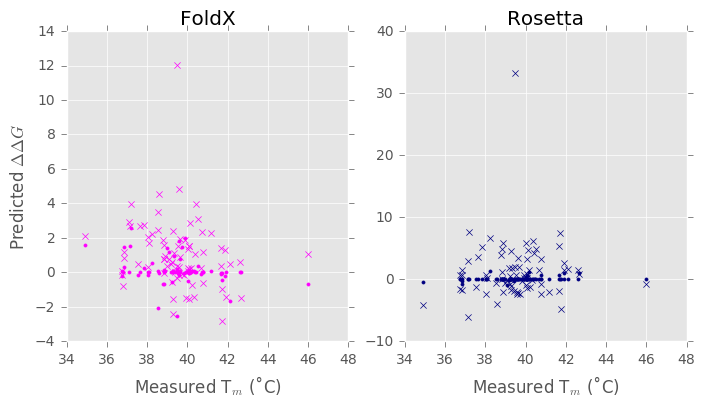

In [62]:
plt.figure( figsize=( 8, 4 ) )

plt.subplot( 1, 2, 1 )
plt.title( 'FoldX')
plt.scatter( foldx_df.tm, foldx_df[ 'total energy' ], marker='x', color='magenta' ) # supposed to be correlated
plt.scatter( foldx_df.tm, foldx_df[ 'Electrostatics' ], marker='.', color='magenta' ) # actual best correlated 
plt.xlabel( 'Measured T$_m$ (˚C)' )
plt.ylabel( 'Predicted $\Delta\Delta G$')

plt.subplot( 1, 2, 2 )
plt.title( 'Rosetta' )
plt.scatter( rosetta_df.tm, rosetta_df[ 'total' ], marker='x', color='navy' ) # supposed to be correlated
plt.scatter( rosetta_df.tm, rosetta_df[ 'hbond_bb_sc' ], marker='.', color='navy' ) # actual best correlated 
plt.xlabel( 'Measured T$_m$ (˚C)' )

plt.show()